In [49]:
from Model import Levels, ElectronsTransitionsData, AtomsTransitionsData, PickAndSolve, UFloat, utilities
import numpy as np

from PlotUtils import errsPlot as plt, splt

In [54]:
mean = utilities.mean

In [50]:
n_g = 2.687e25
T_g = 300

In [51]:
# Simulate with T_e = 3 and f_e = 10^-5
T_e_real = 2
f_e_real = 10**-5

ns = np.array( [ PickAndSolve.PickAndSolve().getEquilibrium(  n_g = n_g, f_e = f_e_real, T_e = T_e_real, T_g = T_g ) for i in range(50) ] )
n = np.array( [ utilities.mean( ns[:,i] ) for i in range( ns.shape[1] ) ] )
levels_tofit = Levels.Levels().namesToIdxs(['2p1','2p2','2p3','2p4','2p5','2p6','2p7','2p8','2p9','2p10'])
n_real = n[levels_tofit]

Text(0.5, 1.0, 'Simulated spectra to be fitted')

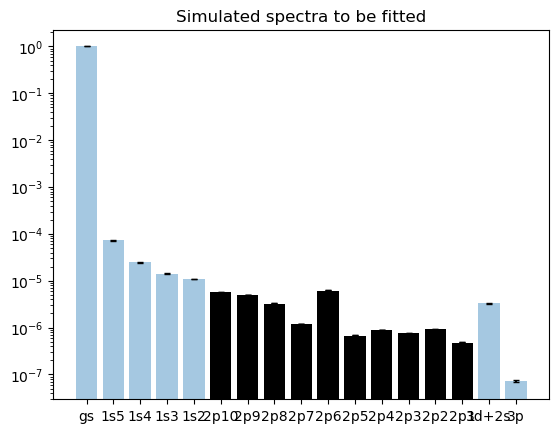

In [52]:
plt.figure()

plt.bar( Levels.Levels().all_names(), n, alpha = 0.4 )
plt.bar( levels_tofit, n_real, keep_color=True )
plt.yscale('log')

plt.title("Simulated spectra to be fitted")

In [58]:
for tol_exp in [12]:

    # Now try to estimate f_e and T_e
    milogf_es, T_es = PickAndSolve.PickAndSolve.manyPicksAndSolve(
        n_real, levels_tofit,
        howManyPicks=10,
        tol = 10**(-tol_exp)
    )

    for mg, te in zip( milogf_es, T_es ):
        print( mg, te )

    splt.init()
    plt.semilogx( np.power( 10, -milogf_es), T_es, '.', label = 'Fits results' )
    plt.plot( f_e_real, T_e_real, 'o', label = "Real value" )
    plt.plot( [10**mean( -milogf_es ).n], [mean( T_es ).n], 'o', label = "Average of fit results" )
    plt.xlabel(f"$f_e$")
    plt.xlim( 10**-10, 1 )
    plt.ylabel(f"$T_e$ [K]")
    plt.ylim( 0, 5 )
    plt.legend()

    print( mean( milogf_es ), mean( T_es ) )
    print( -np.log10(f_e_real), T_e_real )

    # splt.export(f"A01_UsingChiSquared_100picks_1e{tol_exp}tol_noGuess_withLogChi")

 10%|█         | 1/10 [02:20<21:02, 140.23s/it]


KeyboardInterrupt: 

100%|██████████| 100/100 [39:47<00:00, 23.88s/it]


1.0996902722289543 0.20000084603832705
1.058242106854691 0.20000092293348462
1.1019639437795996 0.20000066123556892
1.0646296384702365 0.20000079607963908
1.0775194655114855 0.20000096620665142
1.0836787749806989 0.20000088349853093
1.0905685715354467 0.20000075177876395
1.1070951329416958 0.20000066253070295
1.0807372919032279 0.20000093953313203
1.1058331758567141 0.20000092364929742
1.0786404505859215 0.20000036542649255
1.0922049744663338 0.20000098382304415
1.0954921305721075 0.2000008176926326
1.0997803484696504 0.20000069349481545
1.0983400925087812 0.2000008469543203
1.0614170622858203 0.20000063386756858
1.0914288280935311 0.2000005032256202
1.1109829197313776 0.20000095545537028
1.070563794197068 0.20000067079992662
1.0829467538221407 0.20000093506746067
1.0692944294450868 0.20000057801285168
1.0926496334837759 0.2000005462401624
1.1099601559562375 0.20000067044171188
1.0745022556274457 0.20000074334912132
1.0690723092589698 0.2000008169684801
1.1168842659821039 0.20000099606

100%|██████████| 100/100 [43:51<00:00, 26.32s/it]


1.075634846515315 0.20000098422852708
1.086193564376987 0.20000086722299143
1.0887887332484052 0.20000092617785226
1.1069372168000136 0.2000007670275228
1.1139520371418334 0.20000069906962217
1.1122461531191323 0.20000073834223628
1.118089855799431 0.2000008390728817
1.0692012385622849 0.2000009459593617
1.0742590380670956 0.2000006986379466
1.0866226468361964 0.2000008202046916
1.090801448421631 0.20000091412311088
1.0590107581123789 0.2000008279716306
1.1107600021488695 0.20000060282006846
1.1111753556995623 0.2000007850102829
1.0740853534777624 0.2000009601721386
1.0961571535230668 0.20000076179061319
1.0664126979608188 0.20000065208387136
1.1241931454508247 0.20000069490731323
1.0743810344656386 0.20000095439548182
1.0983731487647788 0.20000053079398436
1.079874944808636 0.2000001281521012
1.1035979567981964 0.20000093617779433
1.0551723939091477 0.20000063369231852
1.0689800946692183 0.20000080344681845
4.532000129405645 0.20000254153208788
1.070245143387406 0.20000039047236787
1.

100%|██████████| 100/100 [1:26:42<00:00, 52.03s/it]


3.6280422468797626 0.20000362853220702
1.085759907528164 0.20000089191254392
5.065879950692138 2.69999999890427
4.848119970793749 1.2999999945580183
1.066546997052705 0.20000073557548642
5.058126408491182 2.439718063295733
3.0223323779259705 0.1999998183573735
3.286175914571495 0.20079600177433862
4.9100950329957085 1.4507957759081136
4.8448192547590425 1.59122752810757
1.05679738492952 0.20000089509380897
1.0534687404383964 0.2000006989217091
4.898069133401714 1.838465049133031
3.4515452288500694 0.20109778655720975
1.0876639904565446 0.20000064676433532
4.266779867196872 0.40859562402228894
11.916793215196428 2.6462315793718307
4.936510392299243 1.6664384011663484
1.081364773337284 0.200000628174894
4.520882291327917 0.6766014908888712
4.936924799027375 1.999999999404281
4.1276108793481985 0.416271130610406
5.063562647585073 2.4871499651541833
1.0401301777019145 0.20000061128003535
5.026258653445343 2.1220212699879224
5.009043899020207 2.815111590937281
3.465569242792908 0.2004388208

100%|██████████| 100/100 [1:42:04<00:00, 61.24s/it]


4.840077515889422 1.5999999921116943
4.78496673389123 1.3456479029571624
5.204602608261992 3.29999999682283
4.552210725467873 0.7539896413577969
4.985225085365685 2.260274336299429
14.99999179481734 4.583020450318056
3.4121508178766513 0.20002016435978234
4.693487841321442 0.874272034757263
4.1645568426061566 0.20000234494396624
4.955367360701407 1.9331933238598318
5.136722458664351 2.632427311981872
4.940800452597959 1.800000000016202
3.815999964624254 0.20000311533946666
4.5563410801790685 0.7873455366897743
4.902412591112364 1.4999999948093632
4.870600333586051 1.4516226123470328
3.766895545464792 0.2000438287410354
3.8695058602305306 0.20000285423895028
9.259638816549087 1.7999999985753568
4.97643281027373 2.1962164946663028
5.068416145379927 2.119478689998322
1.0556106099300049 0.19999995952606542
15.0 3.2722979039587186
4.420176505796378 0.6606321713531144
3.0451450687780754 0.19999994488567333
5.241403592469963 3.6409741064890158
1.2100747352686196 0.200000005225901
5.2437602310

100%|██████████| 100/100 [1:50:51<00:00, 66.51s/it]


4.9583426241121895 2.1611515706903965
5.610134116692141 19.8
4.229429300272864 0.20000231510538385
3.970556863035971 0.30111921858988777
4.288726564190314 0.200002484544741
4.1644487524295 0.4153491290441089
3.0545455123948893 0.1999999760208486
5.045594853044855 2.529356353620514
3.864941955148446 0.20014157880626726
4.838374911106322 1.1999999988568748
4.007458441740512 0.20000252380518874
3.035904226910146 0.1999997034914501
1.093035155618087 0.20001468277053283
3.064103703516189 0.1999918404702879
3.0445615055551065 0.19999997496029107
3.587595640789202 0.20000629477891999
3.0380287475509595 0.19999840649408882
4.1056187459782185 0.20000249806386036
4.8888178975558585 1.4709294207897168
3.5677061887631654 0.20000485668411416
5.09284167790078 2.2694658814808872
3.8280433142825134 0.20000271379370782
4.583132134004734 0.8853000549560317
4.979988761098928 2.3999999926542803
4.7768096249230245 1.3897345102320817
3.663716049038384 0.2000031920322961
3.6294737893684523 0.2000031018586291

100%|██████████| 100/100 [2:05:52<00:00, 75.52s/it]


4.31655845092177 0.20000249501221834
4.330894686671893 0.5300354769240363
4.956278445395901 1.8625771992829283
4.763364688445852 0.9759789110789988
4.705480418442444 1.0916493379382495
4.207046631735256 0.4147402765318688
5.052343661154283 2.4637176971479415
8.924700148266304 2.7998498644330274
10.729576972191074 2.039125716682026
4.1482584042019015 0.20000239806839887
4.474891575450137 0.6969761832232666
4.8651806565126625 1.59999999772246
3.7880103232558273 0.20000278642190966
4.508682574187452 0.6430271757860941
5.015862785868409 1.9999999929094165
10.189051399324477 1.7490461096381176
3.9162993186769848 0.30164611172252087
4.799433748132577 1.2999999947233993
4.510709858896217 0.7800580003647919
5.124837051035101 2.6782867845955236
4.623275610610551 0.7918352539210792
4.8018506219356505 0.9641369857802017
4.099636997542561 0.3007465672684848
15.0 1.7294642064774295
4.9609661519172334 2.081258209709161
5.5514901976557764 19.8
3.6882144967347243 0.20000402004888881
3.1102716647596087

100%|██████████| 100/100 [2:21:19<00:00, 84.80s/it]  


3.5369092660632493 0.2000043349301621
5.0742820153498505 2.1534569757230444
4.914275378884221 1.4999999975016203
3.997516348707994 0.30112802358609614
5.044291483511939 2.191529437722831
5.090633585129117 2.237285262400682
4.0523920186885825 0.20000261533778857
3.853749959735498 0.20000310980459116
4.774510621134154 1.1736632487818581
4.466895268191242 0.6626150624100828
3.98140606657646 0.2000025014080371
1.0678166959274398 0.20015266707147808
3.507400024327931 0.20000595692176398
4.915410229680767 1.632557081592676
4.892365188519591 1.3454836538517068
5.106018894724487 2.399999990823086
3.9700737440185123 0.2000027264032927
4.334753032582556 0.2000022945217971
4.091873961025494 0.20000267647364428
5.116239679505102 2.6999999951088487
4.842046863303494 1.699999994388252
4.93860404672327 2.1239457810664875
3.9966509223734157 0.20000259321182573
4.938555287563886 2.178082034795559
5.079333776518384 2.599999997839939
9.16271454978076 1.7999999956380122
3.942207774238082 0.200002589870066

100%|██████████| 100/100 [2:23:22<00:00, 86.03s/it]  


9.875201781458376 4.607154019632034
4.367140823922402 0.2000024183405222
4.726414703574658 1.2364291626216417
5.051663535353931 1.9414109828750326
4.816311473927262 1.3999999996477297
3.584565545631432 0.20000443161972592
4.897959861247273 1.5999999984016307
5.07634039244864 2.0956649056746204
4.614367615157118 0.7984698395991813
4.581347945328944 0.7696087100675003
4.8201309593987105 1.4791052798412057
5.143518958865118 3.099999997755348
4.907135233560979 1.5999999930710365
3.5418046041360496 0.20000395936219373
10.280348316609153 7.099992197937551
1.0692023923092975 0.20013102141153258
5.0668703435937985 2.258725680496377
3.9943153387296437 0.30088288286642667
4.958604977727522 2.0684804621018675
5.02416247550233 2.6999999986355383
4.887047198720195 1.599999998458139
4.280597385879806 0.20000245585360468
4.326873744428825 0.539431076303327
4.920254052800556 1.8448850070652174
3.581417431263808 0.20000477664794264
4.899794247822239 1.6944903015062471
4.931733341775456 1.79999999081684

100%|██████████| 100/100 [2:27:29<00:00, 88.49s/it] 


5.108793825690442 3.22180045320732
4.852125173428864 1.551756895928805
3.6768542788727236 0.20000351347034875
4.748347163350419 1.1033402779909023
4.081490640955499 0.20000244158801914
4.917042288673228 1.7999999956352282
5.013034142367763 2.018052759310604
5.0452693848500605 2.5228916907545185
5.07025766728395 2.3640420650598064
10.411688147736857 3.2521162732936677
5.052061459989162 2.199315005599397
4.953410973495322 1.7999999915716
5.020234325920513 2.6999999959900944
5.0297401222274845 2.420385341406113
3.8822266060788735 0.2000027328846746
5.030996084274428 2.6332578037105105
5.005797799484761 2.2982056941555764
4.8261362014724725 1.3999999959545124
4.962170333918884 1.7999999942785514
5.091441641619204 2.247534520400095
11.514830931917023 1.8630465225574269
3.521022357601742 0.2000095380817714
5.0307833207171315 2.3494242421264775
4.858453344824598 1.3973962634652615
3.692754112930492 0.20000369618730723
4.891331180862732 1.8999999932101392
3.79034470569328 0.20000286188196037
4

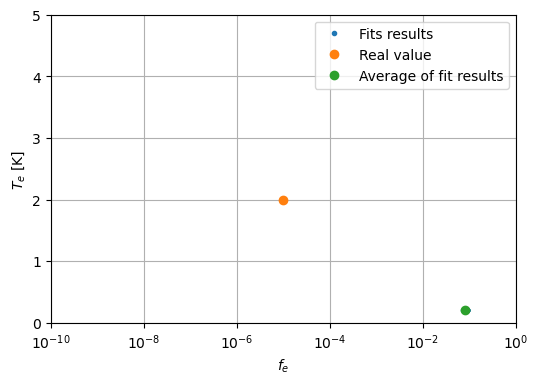

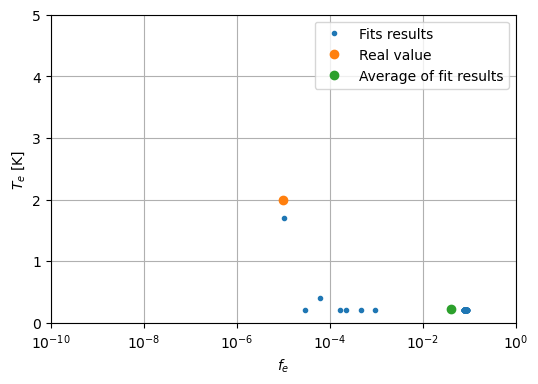

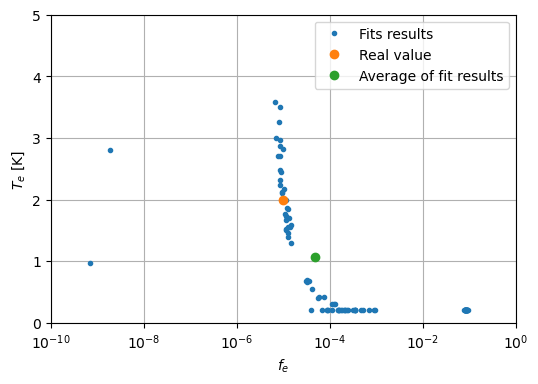

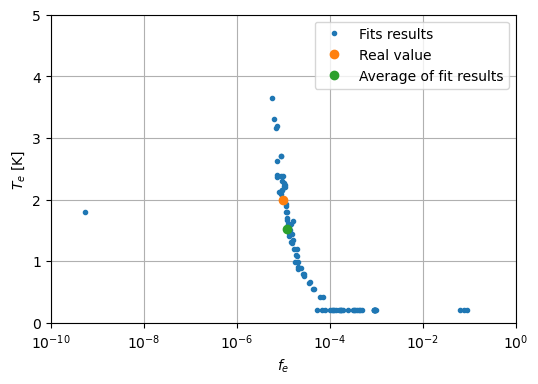

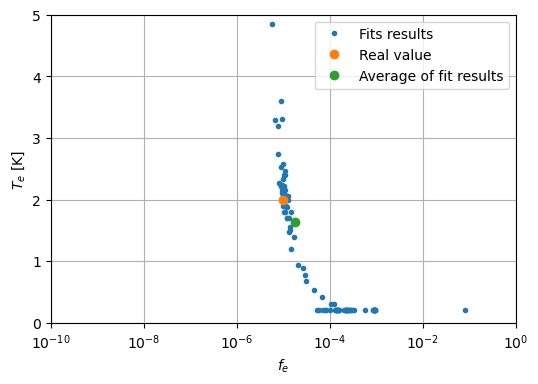

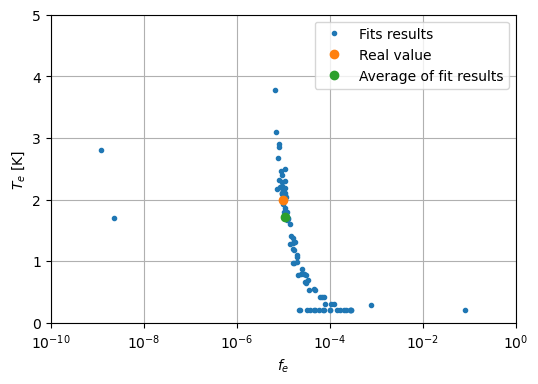

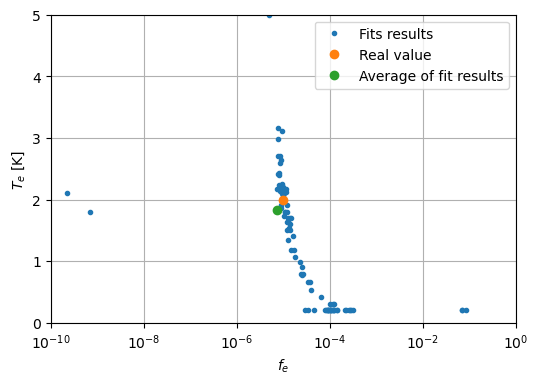

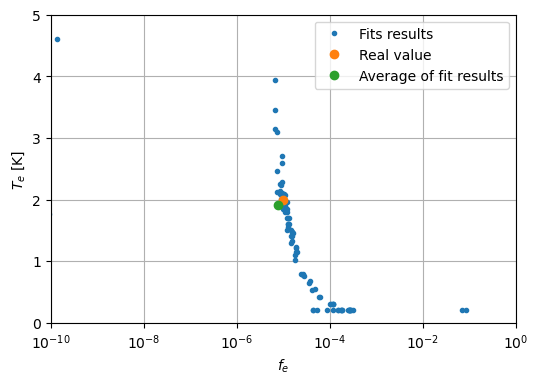

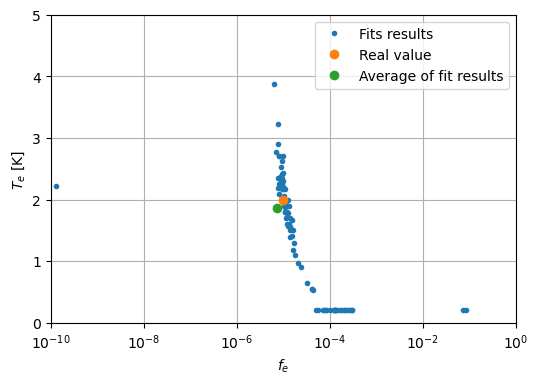

In [ ]:
for tol_exp in [8,9,10,11,12,13,14,15,16]:

    # Now try to estimate f_e and T_e
    milogf_es, T_es = PickAndSolve.PickAndSolve.manyPicksAndSolveUsingCG(
        n_real, levels_tofit,
        howManyPicks=100,
        # T_e_guess=T_e_real, minus_log_f_e_guess=-np.log10(f_e_real),
        tol = 10**(-tol_exp)
    )

    for mg, te in zip( milogf_es, T_es ):
        print( mg, te )

        

    splt.init()
    plt.semilogx( np.power( 10, -milogf_es), T_es, '.', label = 'Fits results' )
    plt.plot( f_e_real, T_e_real, 'o', label = "Real value" )
    plt.plot( 10**mean( -milogf_es ).n, mean( T_es ).n, 'o', label = "Average of fit results" )
    plt.xlabel(f"$f_e$")
    plt.xlim( 10**-10, 1 )
    plt.ylabel(f"$T_e$ [K]")
    plt.ylim( 0, 5 )
    plt.legend()

    print( mean( milogf_es ), mean( T_es ) )
    print( -np.log10(f_e_real), T_e_real )

    splt.export(f"A01_UsingChiSquared_100picks_1e{tol_exp}tol_noGuess_withLogChiAndCHmethod")

In [ ]:
# minf_es, T_es = PickAndSolve.PickAndSolve.manyPicksAndSolve(
#     [ ufloat( 4, 0.2 ), ufloat( 4.5, 0.2 ), ufloat( 8, 0.2 ), ufloat( 2.2, 0.2 )],
#     Levels.Levels().namesToIdxs(['2p9', '2p8', '2p6', '2p4']),
#     howManyPicks=25
# )

  0%|          | 0/25 [00:00<?, ?it/s]

Loaded 121 files
Loaded 82 rows
Initializing class RadiativeTransitions


100%|██████████| 25/25 [06:50<00:00, 16.40s/it]


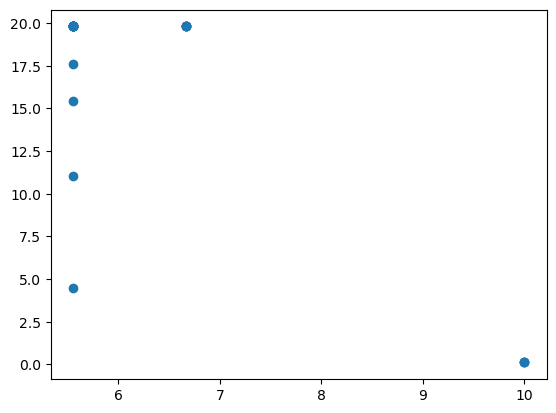

In [ ]:
plt.plot( minus_log_f_es / np.log(10), T_es, 'o' )

In [ ]:
f_es = np.logspace( -10, 0, 50 )
T_es = np.linspace( 0.11, 19.8, 50 )

measured_levels = [ ufloat( 4, 0.2 ), ufloat( 4.5, 0.2 ), ufloat( 8, 0.2 ), ufloat( 2.2, 0.2 )]
measured_levels_idxs = Levels.Levels().namesToIdxs(['2p9', '2p8', '2p6', '2p4'])
#     howManyPicks=25
n_g = 2.687e+29
T_g = 300


data = np.zeros( (len( f_es ), len( T_es )) )
for i_f, f in tqdm( enumerate( f_es ), total=len( f_es ) ):
    for i_t, t in enumerate( T_es ):
        data[ i_f, i_t ] = pas.chiSquared( 
            measured_levels, pas.getEquilibrium( n_g, f, t, T_g )[measured_levels_idxs] )


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
print( f_es[ np.unravel_index( np.argmin( data ), data.shape )[0] ], T_es[ np.unravel_index( np.argmin( data ), data.shape )[1] ] )
print( data[ np.unravel_index( np.argmin( data ), data.shape ) ])

3.088843596477485e-06 9.352244897959185
54.47599040542863


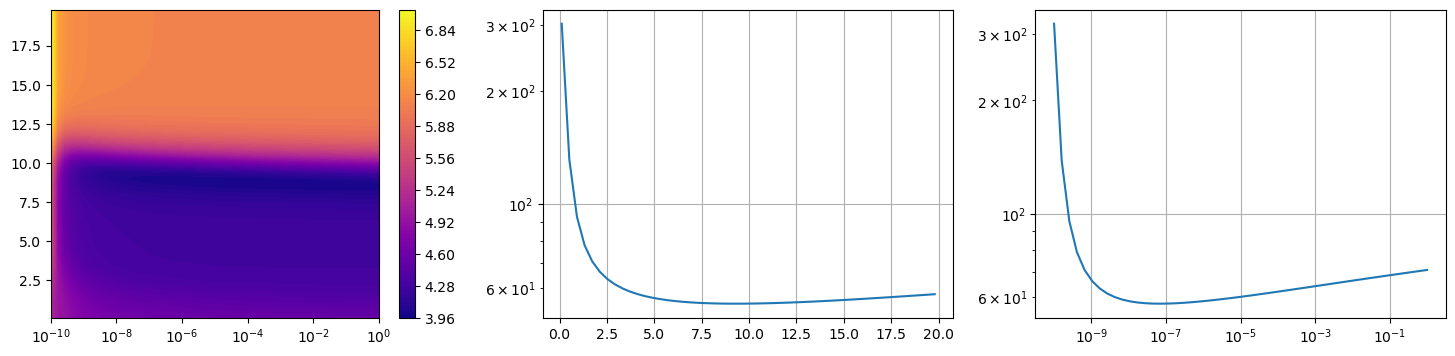

In [ ]:
splt.init_bytot( 3 )
splt.next()

plt.contourf( f_es, T_es, np.log( data ), cmap = 'plasma', levels = 100 )
plt.xscale('log')
plt.colorbar()

splt.next()
plt.semilogy( T_es, data[np.unravel_index( np.argmin( data ), data.shape )[0],:] )
splt.next()
plt.loglog( f_es, data[np.unravel_index( np.argmin( data ), data.shape )[1],:] )

In [ ]:
from scipy.optimize import minimize
from plots import splt

In [ ]:
minimize(
    lambda x: pas.chiSquared( measured_levels, pas.getEquilibrium( n_g, 10**( -x[0] ), x[1], T_g )[measured_levels_idxs] ),
    [ -5, 2 ],
        bounds=[
        (1, 15),
        (0.11, 19.8)
        ],
        callback= lambda intermediate_result : print( intermediate_result.x, intermediate_result.fun ),
        tol = 1e-8
        ).x

[ 1.54428142 18.87190558] 447.7877651136975
[ 4.54460193 19.8       ] 246.4602349405925
[ 9.78081156 18.50237998] 89.0129780199223
[ 8.10644054 19.51341804] 71.92388244087789
[ 8.05882914 19.52419416] 71.89742382368635
[ 7.19101764 19.8       ] 70.85032570501699
[ 5.66324743 19.8       ] 54.9989430288059
[ 5.71519288 19.79676858] 54.96175084268368
[ 5.69465397 19.69591813] 54.92585354983981
[ 5.68744518 19.54526337] 54.91287685089486
[ 5.66108671 18.61096905] 54.851573555256614
[ 5.61072458 16.08278596] 54.70517505470838
[ 5.53967334 11.7319719 ] 54.48747831653253
[ 5.52743095 10.5045056 ] 54.434241309607245
[ 5.55648149 10.71913188] 54.3387110398303
[ 5.57503009 11.07205867] 54.32457409384308
[ 5.5757943  11.05272703] 54.32448306505286
[ 5.57550736 11.02840818] 54.324469724342265
[ 5.57536167 11.01863219] 54.3244645395329
[ 5.5751083  11.00343754] 54.32445629988847
[ 5.57504515 11.00011014] 54.32445441379235
[ 5.5750432  11.00000539] 54.32445435531755


array([ 5.5750432 , 11.00000539])